### Using pandas to explore and balance data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('follow_data.csv', sep=',')

In [3]:
df.describe()

,Unnamed: 0,F_ir,FL_ir,BL_ir,translate,rotate
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,0.974193,0.771748,0.777646,0.386800,-0.025320
std,721.83216,0.092210,0.153112,0.158911,0.278835,0.607815
min,0.00000,0.382497,0.324775,0.407204,0.050000,-1.000000
25%,624.75000,1.000000,0.677244,0.674119,0.200000,-0.300000
50%,1249.50000,1.000000,0.755616,0.762613,0.300000,0.000000
75%,1874.25000,1.000000,0.886426,0.916239,0.500000,0.400000
max,2499.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='FL_ir', ylabel='BL_ir'>

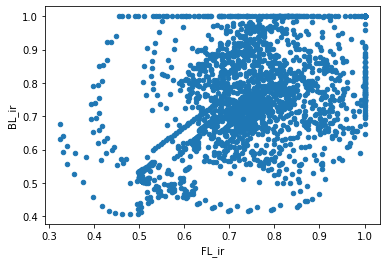

In [4]:
df.plot.scatter(x="FL_ir", y= "BL_ir")

<AxesSubplot:>

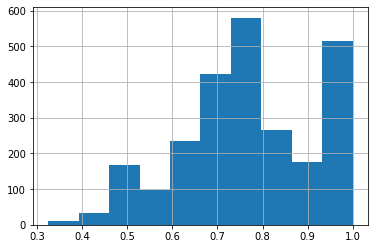

In [5]:
df['FL_ir'].hist()

<AxesSubplot:>

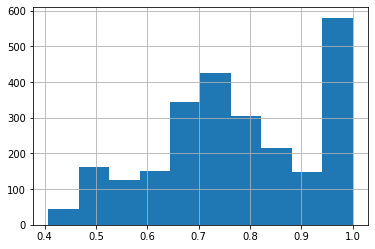

In [6]:
df['BL_ir'].hist()

<AxesSubplot:xlabel='translate', ylabel='rotate'>

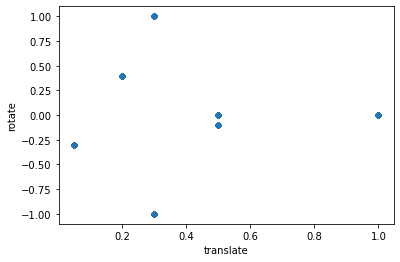

In [7]:
df.plot.scatter(x="translate", y="rotate")

### Balancing the data

When training a neural network to handle a variety of situations or classes it is
important to ensure that each situation has an appropriate number of examples in
the data set.  If one class has too many examples, then the network can reduce loss
simply by guessing that class.  If one class has too few examples, then the network
can simply ignore that class. 

In [8]:
df['situation'].value_counts()

follow     560
adjustR    463
blocked    380
far        371
adjustL    368
no_wall    331
close       27
Name: situation, dtype: int64

In this wall following data set the "follow" situations is over-represented and 
the "close" situation is under-represented. The following function can be used
to balance out each situation in the data set so as to have the goal number of
examples.

In [9]:
len(df)/7

357.14285714285717

In [10]:
def sample_when_large(df, goal_size):
    if len(df) > goal_size:
        return df.sample(n=goal_size)
    else:
        return df

def balance(df):
    """Downsize situations that are over-represented"""
    avg_n = int(len(df)/df['situation'].nunique())
    situations = df['situation'].value_counts().index
    current = df[df.situation == situations[0]]
    balanced = sample_when_large(current, avg_n)
    for i in range(1,len(situations)):
        current = df[df.situation == situations[i]]
        subset = sample_when_large(current, avg_n)
        balanced = pd.merge(balanced, subset, how="outer")
    return balanced

test = balance(df)

In [11]:
test['situation'].value_counts()

adjustL    357
blocked    357
follow     357
far        357
adjustR    357
no_wall    331
close       27
Name: situation, dtype: int64

In [12]:
test.to_csv('balanced_follow_data.csv')